<h3>1. Contour Detection</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

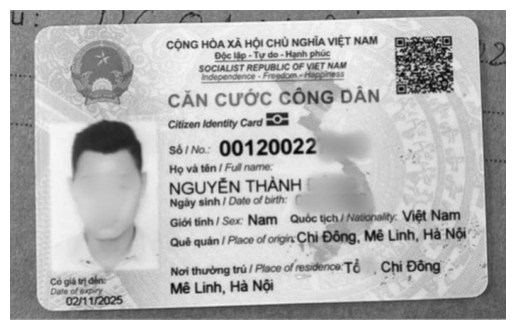

In [1]:
# 1. Read the Image and convert it to Grayscale Format
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image_cccd.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

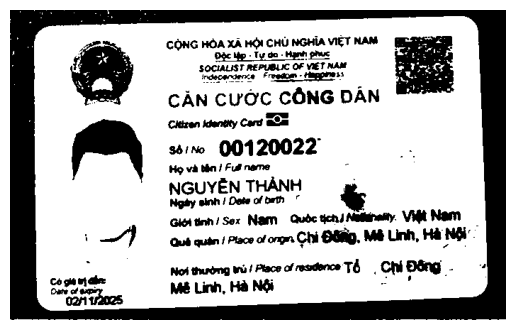

In [2]:
# 2. Apply Binary Thresholding or Canny edge detection
ret, thresh = cv2.threshold(img_gray, 142, 255, cv2.THRESH_BINARY)
# thresh = thresh[50:450, 50:1260]

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show

(-0.5, 699.5, 437.5, -0.5)

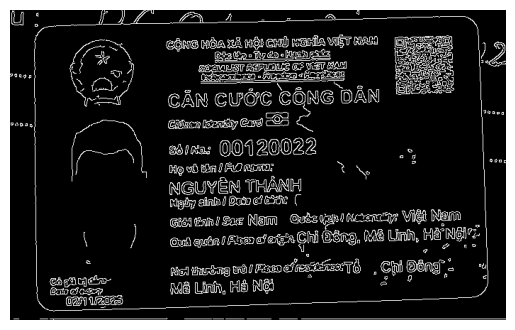

In [3]:
edges = cv2.Canny(img_gray, 110, 200)
plt.imshow(edges,cmap = 'gray')
plt.axis('off')

In [9]:
# 3. Find the Contours
# hàm cv2.findContours()
# --> contours, hierarchy = cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None)

# 1. image: Ảnh đầu vào ở dạng nhị phân (binary image). Thông thường, ảnh này được tạo ra bằng cách sử dụng các 
#    phương pháp như ngưỡng (thresholding) hoặc phát hiện cạnh (edge detection).
#
# 2. mode: Chế độ tìm kiếm đường viền.
#  --> cv2.RETR_EXTERNAL: Chỉ tìm các đường viền ngoài cùng.
#  --> cv2.RETR_LIST: Tìm tất cả các đường viền và lưu trữ chúng mà không cần cấu trúc phân cấp.
#  --> cv2.RETR_CCOMP: Tìm tất cả các đường viền và tổ chức chúng thành hai cấp độ phân cấp.
#  --> cv2.RETR_TREE: Tìm tất cả các đường viền và tổ chức chúng thành một cây phân cấp đầy đủ.
#
# 3. method: Phương pháp xấp xỉ đường viền. 
#  --> cv2.CHAIN_APPROX_NONE: Lưu trữ tất cả các điểm trên đường viền.
#  --> cv2.CHAIN_APPROX_SIMPLE: Loại bỏ các điểm dư thừa và chỉ lưu trữ các điểm cuối cùng của mỗi đoạn thẳng.
#  --> cv2.CHAIN_APPROX_TC89_L1 và cv2.CHAIN_APPROX_TC89_KCOS: Các phương pháp xấp xỉ khác sử dụng thuật toán Teh-Chin.
#
# 4. contours: Đầu ra là một danh sách các đường viền được tìm thấy. Mỗi đường viền là một mảng các điểm (tọa độ x, y).
#
# 5. hierarchy: Đầu ra là một mảng chứa thông tin phân cấp của các đường viền.
#
# 6. offset: Tùy chọn, một điểm để bù đắp cho các điểm đường viền.

# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print(hierarchy)

76
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [40 38 -1 -1]
  [41 39 -1 -1]
  [42 40 -1 -1]
  [43 41 -1 -1]
  [44 42 -1 -1]
  [45 43 -1 -1]
  [46 44 -1 -1]
  [47 45 -1 -1]
  [48 46 -1 -1]
  [49 47 -1 -1]
  [50 48 -1 -1]
  [51 49 -1 -1]
  [52 50 -1 -1]
  [53 51 -1 -1]
  [54 52 -1 -1]
  [55 53 -1 -1]
  [56 54 -1 -1]
  [57 55 -1 -1]
  [58 56 -1 -1]
  [59 57 -1 -1]
  [60 58 -1 -1]
  [61 59 -1 -1]
  [62 60 -1 -1]
  [63

<function matplotlib.pyplot.show(close=None, block=None)>

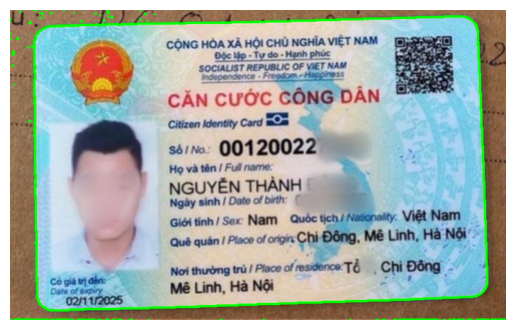

In [10]:
# 4. Draw the Contours
image_copy = image.copy()
# image_copy = image_copy[50:450, 50:1260]
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

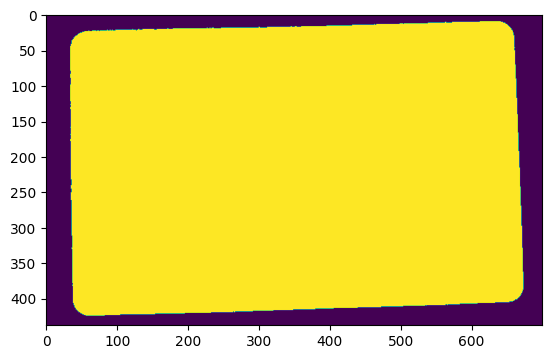

In [22]:
import numpy as np

max_contour = max(contours, key=cv2.contourArea)

output_image = np.zeros_like(image)

cv2.drawContours(output_image, [max_contour], -1, (255), thickness=cv2.FILLED)

output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)
ret, output_image = cv2.threshold(output_image, 0, 255, cv2.THRESH_BINARY)

plt.imshow(output_image)

In [21]:
# Lưu hoặc hiển thị ảnh kết quả
cv2.imwrite('image_cccd_mask.jpg', output_image)

True

<function matplotlib.pyplot.show(close=None, block=None)>

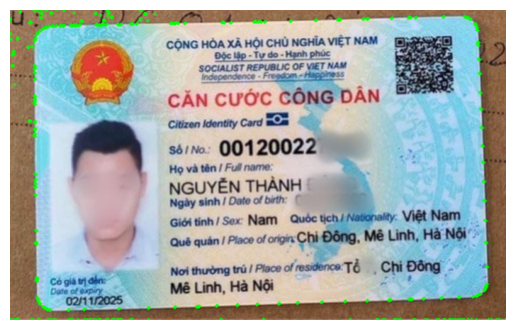

In [7]:
image_copy_2 = image.copy()
for i, contour in enumerate(contours): 
   for j, contour_point in enumerate(contour): 
       cv2.circle(image_copy_2, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(image_copy_2[:,:,::-1])
plt.axis('off')
plt.show

<h3>2. Contour features</h3>

<h4>Moments</h4>

In [23]:
# Moments giúp tính toán một số đặc điểm như tâm khối của vật thể, diện tích của vật thể,... 
cnt = contours[0]
M = cv2.moments(cnt)
print(M)
print()
# Centroid được tính theo công thức cx = M10/M00, cy = M01/M00
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}



ZeroDivisionError: float division by zero

<h4>Contour Area</h4>

In [177]:
# Diện tích đường viền được tính bằng hàm cv2.contourArea() hoặc moments M['m00']
area = cv2.contourArea(cnt)
print(area)

57189.5


<h4>Contour Perimeter</h4>

In [178]:
# Tham số thứ hai thể hiện là viền khép kín hay chỉ là đường cong
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

2003.0205434560776


<h4>Contour Approximation</h4>

In [179]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
print(approx)

[[[120  27]]

 [[166 448]]

 [[411 158]]]


<h4>Convex Hull</h4>

In [180]:
hull = cv2.convexHull(cnt)
print(hull)

[[[136  26]]

 [[186  42]]

 [[189  43]]

 [[194  45]]

 [[398 130]]

 [[403 136]]

 [[407 144]]

 [[411 158]]

 [[411 159]]

 [[368 245]]

 [[180 435]]

 [[179 436]]

 [[166 448]]

 [[151 448]]

 [[145 443]]

 [[ 42 247]]

 [[ 41 245]]

 [[ 36 228]]

 [[ 36 227]]

 [[ 53 174]]

 [[101  37]]

 [[109  29]]

 [[120  27]]

 [[135  26]]]


<function matplotlib.pyplot.show(close=None, block=None)>

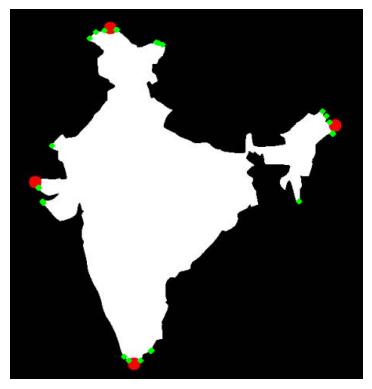

In [181]:
image_copy_hull = image.copy()
for i, contour_point in enumerate(hull): 
    cv2.circle(image_copy_hull, (contour_point[0][0], contour_point[0][1]), 2, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(image_copy_hull[:,:,::-1])
plt.axis('off')
plt.show

<h4>Extreme Points</h4>

(36, 227)
(411, 159)
(135, 26)
(151, 448)


<function matplotlib.pyplot.show(close=None, block=None)>

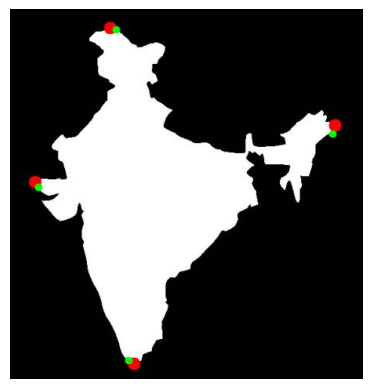

In [182]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)

image_copy_extreme = image.copy()
cv2.circle(image_copy_extreme, leftmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, rightmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, topmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, bottommost , 3, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(image_copy_extreme[:,:,::-1])
plt.axis('off')
plt.show